In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import random
import math

from src.segment import egg_contours
from src.load import load_image
from src.bound_eggs import fit_ellipses

from tqdm.notebook import tqdm

# If we are using PyCharm dark mode, the image will be inverted unless we do this
plt.style.use('dark_background')

In [2]:
species = ['Podilymbus podiceps podiceps',
 'Hydrobates leucorhous leucorhous',
 'Pelecanus erythrorhynchos',
 'Nannopterum auritum albociliatum',
 'Urile penicillatus',
 'Urile pelagicus resplendens',
 'Ardea herodias wardi',
 'Egretta caerulea',
 'Butorides virescens virescens',
 'Nycticorax nycticorax hoactli',
 'Pandion haliaetus carolinensis',
 'Elanus leucurus majusculus',
 'Buteo lineatus lineatus',
 'Buteo swainsoni',
 'Buteo jamaicensis calurus',
 'Aquila chrysaetos canadensis',
 'Falco mexicanus',
 'Falco sparverius sparverius',
 'Callipepla californica californica',
 'Rallus obsoletus obsoletus',
 'Porzana carolina',
 'Fulica americana americana',
 'Charadrius nivosus nivosus',
 'Charadrius vociferus vociferus',
 'Himantopus mexicanus mexicanus',
 'Actitis macularius',
 'Larus occidentalis wymani',
 'Sterna forsteri',
 'Sterna hirundo hirundo',
 'Onychoprion fuscatus ssp.',
 'Sternula antillarum browni',
 'Thalasseus elegans',
 'Chlidonias niger surinamensis',
 'Uria aalge californica',
 'Cepphus columba columba',
 'Fratercula cirrhata',
 'Zenaida macroura marginella',
 'Geococcyx californianus',
 'Asio otus wilsonianus',
 'Selasphorus sasin sasin',
 'Colaptes auratus collaris',
 'Sayornis nigricans semiater',
 'Sayornis phoebe',
 'Empidonax traillii ssp.',
 'Contopus sordidulus veliei',
 'Tachycineta bicolor',
 'Petrochelidon pyrrhonota pyrrhonota',
 'Hirundo rustica erythrogaster',
 'Corvus corax sinuatus',
 'Corvus cryptoleucus',
 'Corvus brachyrhynchos hesperis',
 'Aphelocoma californica californica',
 'Poecile gambeli abbreviatus',
 'Psaltriparus minimus minimus',
 'Campylorhynchus brunneicapillus couesi',
 'Salpinctes obsoletus obsoletus',
 'Troglodytes aedon parkmanii',
 'Dumetella carolinensis',
 'Mimus polyglottos leucopterus',
 'Toxostoma bendirei',
 'Toxostoma curvirostre palmeri',
 'Toxostoma redivivum redivivum',
 'Oreoscoptes montanus',
 'Sialia currucoides',
 'Sialia mexicana occidentalis',
 'Catharus ustulatus ustulatus',
 'Catharus guttatus sequoiensis',
 'Hylocichla mustelina',
 'Turdus migratorius migratorius',
 'Turdus migratorius propinquus',
 'Phainopepla nitens lepida',
 'Lanius ludovicianus gambeli',
 'Lanius ludovicianus sonoriensis',
 'Setophaga petechia morcomi',
 'Setophaga coronata auduboni',
 'Cardellina pusilla chryseola']

In [3]:
data = pd.read_csv('../data/California_Egg_Data.csv')

In [4]:
dataset = []

In [5]:
labels = []

In [6]:
for idx, row in tqdm(data.iterrows()):
    if row["SCIENTIFIC_NAME"] in species:
        dataset.append(load_image(row["IMAGE URL"]))
        labels.append(row["SCIENTIFIC_NAME"])

0it [00:00, ?it/s]

In [7]:
train_images = dataset.copy()
train_labels = labels.copy()

In [8]:
test_images = []
test_labels = []

In [9]:
for _ in range(215):
    r = random.randint(0,len(train_images)-1)

    test_labels.append(train_labels.pop(r))
    test_images.append(train_images.pop(r))

In [10]:
train_contours = []
test_contours = []

In [11]:
for img in tqdm(train_images):
    train_contours.append(egg_contours(img))

for img in tqdm(test_images):
    test_contours.append(egg_contours(img))

  0%|          | 0/2418 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

In [12]:
train_ellipses = []
test_ellipses = []

In [13]:
for contour in tqdm(train_contours):
    train_ellipses.append(fit_ellipses(contour, len(contour)))

for contour in tqdm(test_contours):
    test_ellipses.append(fit_ellipses(contour, len(contour)))

  0%|          | 0/2418 [00:00<?, ?it/s]

C:\Users\willi\PycharmProjects\BirdEggSpecies\src\bound_eggs.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(ellipses)


  0%|          | 0/215 [00:00<?, ?it/s]

In [14]:
def get_sub_image(rect, src):
    # Get center, size, and angle from rect
    center, size, theta = rect
    # Convert to int
    center, size = tuple(map(int, center)), tuple(map(int, size))
    # Get rotation matrix for rectangle
    m = cv2.getRotationMatrix2D( center, theta, 1)
    # Perform rotation on src image
    dst = cv2.warpAffine(src, m, (src.shape[1],src.shape[0]))
    out = cv2.getRectSubPix(dst, size, center)
    return out

def contours_to_imgs(img, contours, output_shape=(64,64)):
    imgs = []
    for c in contours:
        #plt.imshow(cv2.drawContours(img,[rect], -1, (255,0,0)))
        imgs.append(cv2.resize(get_sub_image(cv2.minAreaRect(c), img.copy()), output_shape))
    return imgs

In [15]:
el = train_contours[10]
img = train_images[10]

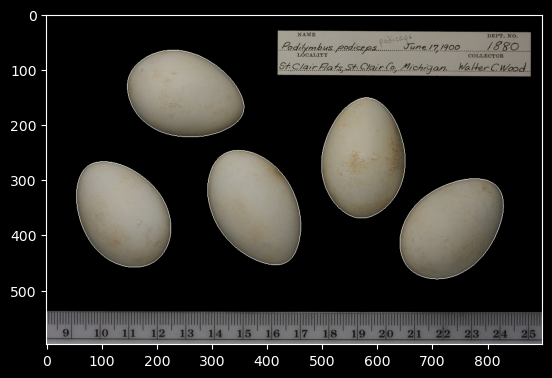

In [16]:
plt.imshow(cv2.drawContours(img, el, -1, (255,255,255)))

In [17]:
t = contours_to_imgs(img, el, output_shape=(224,224))

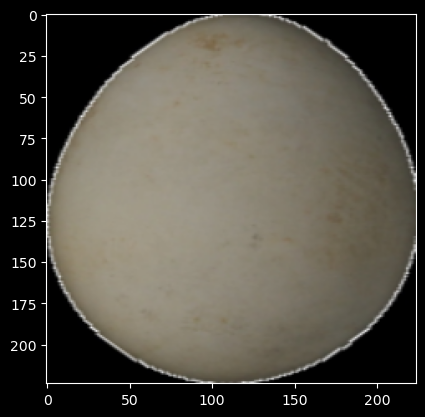

In [18]:
plt.imshow(t[0])

In [19]:
test_imgs = []
test_img_labels = []
for img, contour, label in zip(test_images, test_contours, test_labels):
    for x in contours_to_imgs(img, contour, output_shape=(160,160)):
        test_imgs.append(x)
        test_img_labels.append(label)

In [20]:
train_imgs = []
train_img_labels = []
for img, contour, label in zip(train_images, train_contours, train_labels):
    for x in contours_to_imgs(img, contour, output_shape=(160,160)):
        train_imgs.append(x)
        train_img_labels.append(label)

In [21]:
test_imgs = np.stack(test_imgs, axis=0)
test_img_labels = np.asarray(test_img_labels)

train_imgs = np.stack(train_imgs, axis=0)
train_img_labels = np.asarray(train_img_labels)

In [22]:
np.savez_compressed("../data/train_dataset.npz", X=train_imgs, Y=train_img_labels)
np.savez_compressed("../data/test_dataset.npz", X=test_imgs, Y=test_img_labels)

In [23]:
ftestdata = np.load("../data/train_dataset.npz", allow_pickle=True)["Y"]
ftraindata = np.load("../data/test_dataset.npz", allow_pickle=True)["Y"]

In [24]:
from sklearn.preprocessing import LabelEncoder
import pickle

encoder1 = LabelEncoder()
encoder1 = encoder1.fit(np.concatenate([ftestdata, ftraindata]))
with open("../data/objects/le.pkl", "wb+") as f:
    pickle.dump(encoder1, f)

"""
encoder2 = LabelEncoder()
encoder2 = encoder2.fit(ftestdata)
with open("../data/objects/test.pkl", "wb+") as f:
    pickle.dump(encoder2, f)"""

'\nencoder2 = LabelEncoder()\nencoder2 = encoder2.fit(ftestdata)\nwith open("../data/objects/test.pkl", "wb+") as f:\n    pickle.dump(encoder2, f)'